In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(y):
      return (1/(1+np.exp(-y)))
    
def sigmoid_derivative(x): 
      return sigmoid(x)*(1 - sigmoid(x)) 
    
def tanh_derivative(x):
    return 1/(np.cosh(x))**2

def binary_cross_entropy(t,y):
    return (-t*(np.log(y+10**(-6)))-(1-t)*(np.log((1-y)+10**(-6))))/len(X_train)

def normalize(max,min,x):
    return ((x-min)/(max-min))


df=pd.read_csv('housepricedata.csv')
Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
Overallqual=[]
Overallcond=[]
Fullbath=[]
Halfbath=[]
BedroomAbvgr=[]
TotRmsAbvgrd=[]
fireplaces=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    Overallqual.append(normalize(df.OverallQual.max(),df.OverallQual.min(),df.OverallQual[i]))
    Overallcond.append(normalize(df.OverallCond.max(),df.OverallCond.min(),df.OverallCond[i]))
    Fullbath.append(normalize(df.FullBath.max(),df.FullBath.min(),df.FullBath[i]))
    Halfbath.append(normalize(df.HalfBath.max(),df.HalfBath.min(),df.HalfBath[i]))
    BedroomAbvgr.append(normalize(df.BedroomAbvGr.max(),df.BedroomAbvGr.min(),df.BedroomAbvGr[i]))
    TotRmsAbvgrd.append(normalize(df.TotRmsAbvGrd.max(),df.TotRmsAbvGrd.min(),df.TotRmsAbvGrd[i]))
    fireplaces.append(normalize(df.Fireplaces.max(),df.Fireplaces.min(),df.Fireplaces[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
Overallqual=pd.DataFrame(Overallqual,columns=['Overallqual'])
Overallcond=pd.DataFrame(Overallcond,columns=['Overallcond'])
Fullbath=pd.DataFrame(Fullbath,columns=['Fullbath'])
Halfbath=pd.DataFrame(Halfbath,columns=['Halfbath'])
BedroomAbvgr=pd.DataFrame(BedroomAbvgr,columns=['BedroomAbvgr'])
TotRmsAbvgrd=pd.DataFrame(TotRmsAbvgrd,columns=['TotRmsAbvgrd'])
fireplaces=pd.DataFrame(fireplaces,columns=['fireplaces'])

df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea','OverallQual','OverallCond','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces'])
frames=[Lotarea,TotalBsmtSf,Garagearea,Overallqual,Overallcond,Fullbath,Halfbath,BedroomAbvgr,TotRmsAbvgrd,fireplaces,df]
df=pd.concat(frames,axis=1)
#df.rename(columns=0:"LotArea","0":"TotalBsmtSF","0":"GarageArea")
print(df)
df1=df.sample(frac=0.8,random_state=1011)
df2=df.drop(df1.index)
X_train=df1.drop(columns=['AboveMedianPrice'])
Y_train=df1['AboveMedianPrice']
X_test=df2.drop(columns='AboveMedianPrice')
Y_test=df2['AboveMedianPrice']
x_train=np.array(X_train)
print(x_train[0,:])
y_train=np.array(Y_train)

print(x_train)

#Initializations
M=7
w=np.random.rand(M,10)
v=np.random.rand(1,M)
wo=np.random.rand(M,1)
vo=np.random.rand(1,1)
k=0
i=0
epochs=[]
error_values=[]
error=0
alpha=0.005
for k in range(10000):
    error=0
    for i in range(len(x_train)):
        a=[]
        z=[]
        
        a=(x_train[i]).dot(w.T)+(wo.T)
        #print('a:',a)
        z=sigmoid(a)
        #print('z',z)
        z=np.array(z)
        y_in=(z).dot(v.T)+vo
        y=sigmoid(y_in)
        #print(y)
        error+=binary_cross_entropy(y_train[i],y)
        err_corr_2=(y_train[i]-y)*(sigmoid_derivative(y))
        j=0
        vo=vo+(alpha)*(err_corr_2)
        err_corr_1=[]
        
        for j in range(M):
            v[:,j]=v[:,j]+(alpha)*(err_corr_2)*(z[:,j])
            err_corr_1.append((err_corr_2)*(v[:,j])*(sigmoid_derivative(z[:,j])))
            j+=1
        #print('err_1',err_corr_1[0])
        j=0
        l=0
        #print(w)
        for j in range(M):
            for l in range(10):
                w[j,l]=w[j,l]+alpha*((err_corr_1[j]))*(x_train[i,l])
                l=l+1
            wo[j]=wo[j]+(alpha)*(err_corr_1[j])
            j=j+1
        #print('w',w)
        i+=1
    
    print('error:',error)
    print('epoch:',k)
    error_values.append(np.asscalar(error))
    epochs.append(k)
    k+=1

plt.plot(epochs,error_values)
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()          


       Lotarea  TotalBsmtSf  Garagearea  Overallqual  Overallcond  Fullbath  \
0     0.033420     0.140098    0.386460     0.666667        0.500  0.666667   
1     0.038795     0.206547    0.324401     0.555556        0.875  0.666667   
2     0.046507     0.150573    0.428773     0.666667        0.500  0.666667   
3     0.038561     0.123732    0.452750     0.666667        0.500  0.333333   
4     0.060576     0.187398    0.589563     0.777778        0.500  0.666667   
...        ...          ...         ...          ...          ...       ...   
1455  0.030929     0.155974    0.324401     0.555556        0.500  0.666667   
1456  0.055505     0.252373    0.352609     0.555556        0.625  0.666667   
1457  0.036187     0.188543    0.177715     0.666667        1.000  0.666667   
1458  0.039342     0.176432    0.169252     0.444444        0.625  0.333333   
1459  0.040370     0.205565    0.194640     0.444444        0.625  0.333333   

      Halfbath  BedroomAbvgr  TotRmsAbvgrd  firepla

error: [[0.58727834]]
epoch: 179
error: [[0.58606111]]
epoch: 180
error: [[0.58476555]]
epoch: 181
error: [[0.58338606]]
epoch: 182
error: [[0.58191689]]
epoch: 183
error: [[0.58035223]]
epoch: 184
error: [[0.57868621]]
epoch: 185
error: [[0.57691303]]
epoch: 186
error: [[0.57502698]]
epoch: 187
error: [[0.57302255]]
epoch: 188
error: [[0.57089452]]
epoch: 189
error: [[0.56863809]]
epoch: 190
error: [[0.56624897]]
epoch: 191
error: [[0.56372355]]
epoch: 192
error: [[0.56105898]]
epoch: 193
error: [[0.55825337]]
epoch: 194
error: [[0.55530588]]
epoch: 195
error: [[0.55221686]]
epoch: 196
error: [[0.54898799]]
epoch: 197
error: [[0.54562233]]
epoch: 198
error: [[0.54212445]]
epoch: 199
error: [[0.53850041]]
epoch: 200
error: [[0.53475783]]
epoch: 201
error: [[0.53090579]]
epoch: 202
error: [[0.52695481]]
epoch: 203
error: [[0.52291669]]
epoch: 204
error: [[0.51880437]]
epoch: 205
error: [[0.51463176]]
epoch: 206
error: [[0.51041346]]
epoch: 207
error: [[0.50616459]]
epoch: 208
error: [[0

error: [[0.66966916]]
epoch: 429
error: [[0.67038028]]
epoch: 430
error: [[0.67103099]]
epoch: 431
error: [[0.67162338]]
epoch: 432
error: [[0.67215938]]
epoch: 433
error: [[0.6726407]]
epoch: 434
error: [[0.67306889]]
epoch: 435
error: [[0.67344529]]
epoch: 436
error: [[0.67377103]]
epoch: 437
error: [[0.67404704]]
epoch: 438
error: [[0.67427401]]
epoch: 439
error: [[0.67445244]]
epoch: 440
error: [[0.67458257]]
epoch: 441
error: [[0.67466442]]
epoch: 442
error: [[0.67469774]]
epoch: 443
error: [[0.67468206]]
epoch: 444
error: [[0.67461661]]
epoch: 445
error: [[0.67450037]]
epoch: 446
error: [[0.67433201]]
epoch: 447
error: [[0.67410991]]
epoch: 448
error: [[0.67383215]]
epoch: 449
error: [[0.67349645]]
epoch: 450
error: [[0.67310022]]
epoch: 451
error: [[0.67264049]]
epoch: 452
error: [[0.67211392]]
epoch: 453
error: [[0.67151678]]
epoch: 454
error: [[0.67084495]]
epoch: 455
error: [[0.6700939]]
epoch: 456
error: [[0.66925867]]
epoch: 457
error: [[0.66833389]]
epoch: 458
error: [[0.6

error: [[0.69211379]]
epoch: 678
error: [[0.69212433]]
epoch: 679
error: [[0.69213472]]
epoch: 680
error: [[0.69214494]]
epoch: 681
error: [[0.69215501]]
epoch: 682
error: [[0.69216492]]
epoch: 683
error: [[0.69217469]]
epoch: 684
error: [[0.69218431]]
epoch: 685
error: [[0.69219378]]
epoch: 686
error: [[0.69220312]]
epoch: 687
error: [[0.69221231]]
epoch: 688
error: [[0.69222137]]
epoch: 689
error: [[0.6922303]]
epoch: 690
error: [[0.6922391]]
epoch: 691
error: [[0.69224777]]
epoch: 692
error: [[0.69225631]]
epoch: 693
error: [[0.69226473]]
epoch: 694
error: [[0.69227303]]
epoch: 695
error: [[0.69228121]]
epoch: 696
error: [[0.69228928]]
epoch: 697
error: [[0.69229723]]
epoch: 698
error: [[0.69230507]]
epoch: 699
error: [[0.6923128]]
epoch: 700
error: [[0.69232042]]
epoch: 701
error: [[0.69232793]]
epoch: 702
error: [[0.69233534]]
epoch: 703
error: [[0.69234265]]
epoch: 704
error: [[0.69234986]]
epoch: 705
error: [[0.69235697]]
epoch: 706
error: [[0.69236398]]
epoch: 707
error: [[0.69

error: [[0.69293148]]
epoch: 928
error: [[0.69293226]]
epoch: 929
error: [[0.69293304]]
epoch: 930
error: [[0.69293381]]
epoch: 931
error: [[0.69293458]]
epoch: 932
error: [[0.69293534]]
epoch: 933
error: [[0.69293609]]
epoch: 934
error: [[0.69293684]]
epoch: 935
error: [[0.69293758]]
epoch: 936
error: [[0.69293832]]
epoch: 937
error: [[0.69293905]]
epoch: 938
error: [[0.69293977]]
epoch: 939
error: [[0.69294049]]
epoch: 940
error: [[0.69294121]]
epoch: 941
error: [[0.69294191]]
epoch: 942
error: [[0.69294262]]
epoch: 943
error: [[0.69294331]]
epoch: 944
error: [[0.69294401]]
epoch: 945
error: [[0.69294469]]
epoch: 946
error: [[0.69294537]]
epoch: 947
error: [[0.69294605]]
epoch: 948
error: [[0.69294672]]
epoch: 949
error: [[0.69294738]]
epoch: 950
error: [[0.69294804]]
epoch: 951
error: [[0.6929487]]
epoch: 952
error: [[0.69294935]]
epoch: 953
error: [[0.69294999]]
epoch: 954
error: [[0.69295063]]
epoch: 955
error: [[0.69295127]]
epoch: 956
error: [[0.6929519]]
epoch: 957
error: [[0.6

error: [[0.69301963]]
epoch: 1172
error: [[0.69301976]]
epoch: 1173
error: [[0.6930199]]
epoch: 1174
error: [[0.69302003]]
epoch: 1175
error: [[0.69302016]]
epoch: 1176
error: [[0.69302029]]
epoch: 1177
error: [[0.69302042]]
epoch: 1178
error: [[0.69302055]]
epoch: 1179
error: [[0.69302068]]
epoch: 1180
error: [[0.69302081]]
epoch: 1181
error: [[0.69302093]]
epoch: 1182
error: [[0.69302106]]
epoch: 1183
error: [[0.69302119]]
epoch: 1184
error: [[0.69302131]]
epoch: 1185
error: [[0.69302143]]
epoch: 1186
error: [[0.69302156]]
epoch: 1187
error: [[0.69302168]]
epoch: 1188
error: [[0.6930218]]
epoch: 1189
error: [[0.69302192]]
epoch: 1190
error: [[0.69302204]]
epoch: 1191
error: [[0.69302216]]
epoch: 1192
error: [[0.69302228]]
epoch: 1193
error: [[0.69302239]]
epoch: 1194
error: [[0.69302251]]
epoch: 1195
error: [[0.69302263]]
epoch: 1196
error: [[0.69302274]]
epoch: 1197
error: [[0.69302285]]
epoch: 1198
error: [[0.69302297]]
epoch: 1199
error: [[0.69302308]]
epoch: 1200
error: [[0.69302

error: [[0.69303618]]
epoch: 1414
error: [[0.69303621]]
epoch: 1415
error: [[0.69303624]]
epoch: 1416
error: [[0.69303627]]
epoch: 1417
error: [[0.6930363]]
epoch: 1418
error: [[0.69303633]]
epoch: 1419
error: [[0.69303636]]
epoch: 1420
error: [[0.69303638]]
epoch: 1421
error: [[0.69303641]]
epoch: 1422
error: [[0.69303644]]
epoch: 1423
error: [[0.69303647]]
epoch: 1424
error: [[0.6930365]]
epoch: 1425
error: [[0.69303652]]
epoch: 1426
error: [[0.69303655]]
epoch: 1427
error: [[0.69303658]]
epoch: 1428
error: [[0.6930366]]
epoch: 1429
error: [[0.69303663]]
epoch: 1430
error: [[0.69303666]]
epoch: 1431
error: [[0.69303668]]
epoch: 1432
error: [[0.69303671]]
epoch: 1433
error: [[0.69303674]]
epoch: 1434
error: [[0.69303676]]
epoch: 1435
error: [[0.69303679]]
epoch: 1436
error: [[0.69303681]]
epoch: 1437
error: [[0.69303684]]
epoch: 1438
error: [[0.69303687]]
epoch: 1439
error: [[0.69303689]]
epoch: 1440
error: [[0.69303692]]
epoch: 1441
error: [[0.69303694]]
epoch: 1442
error: [[0.693036

error: [[0.69303999]]
epoch: 1656
error: [[0.69303999]]
epoch: 1657
error: [[0.69304]]
epoch: 1658
error: [[0.69304001]]
epoch: 1659
error: [[0.69304002]]
epoch: 1660
error: [[0.69304002]]
epoch: 1661
error: [[0.69304003]]
epoch: 1662
error: [[0.69304004]]
epoch: 1663
error: [[0.69304004]]
epoch: 1664
error: [[0.69304005]]
epoch: 1665
error: [[0.69304006]]
epoch: 1666
error: [[0.69304006]]
epoch: 1667
error: [[0.69304007]]
epoch: 1668
error: [[0.69304008]]
epoch: 1669
error: [[0.69304009]]
epoch: 1670
error: [[0.69304009]]
epoch: 1671
error: [[0.6930401]]
epoch: 1672
error: [[0.69304011]]
epoch: 1673
error: [[0.69304011]]
epoch: 1674
error: [[0.69304012]]
epoch: 1675
error: [[0.69304012]]
epoch: 1676
error: [[0.69304013]]
epoch: 1677
error: [[0.69304014]]
epoch: 1678
error: [[0.69304014]]
epoch: 1679


KeyboardInterrupt: 

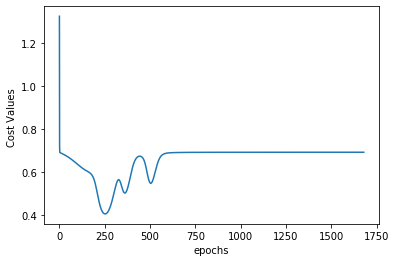

In [50]:
plt.plot(epochs,error_values)
plt.ylabel("Cost Values ")
plt.xlabel("epochs")
plt.show()  

In [ ]:
#normalization partially

Lotarea=[]
TotalBsmtSf=[]
Garagearea=[]
for i in range(len(df)):
    Lotarea.append(normalize(df.LotArea.max(),df.LotArea.min(),df.LotArea[i]))
    TotalBsmtSf.append(normalize(df.TotalBsmtSF.max(),df.TotalBsmtSF.min(),df.TotalBsmtSF[i]))
    Garagearea.append(normalize(df.GarageArea.max(),df.GarageArea.min(),df.GarageArea[i]))
    i+=1
Lotarea=pd.DataFrame(Lotarea,columns=['Lotarea'])
TotalBsmtSf=pd.DataFrame(data=TotalBsmtSf,columns=['TotalBsmtSf'])
Garagearea=pd.DataFrame(Garagearea,columns=['Garagearea'])
df=df.drop(columns=['LotArea','TotalBsmtSF','GarageArea'])
frames=[Lotarea,TotalBsmtSf,Garagearea,df]
df=pd.concat(frames,axis=1)